In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.linear_model
import numpy
import math
import scipy
import matplotlib.pyplot as plt

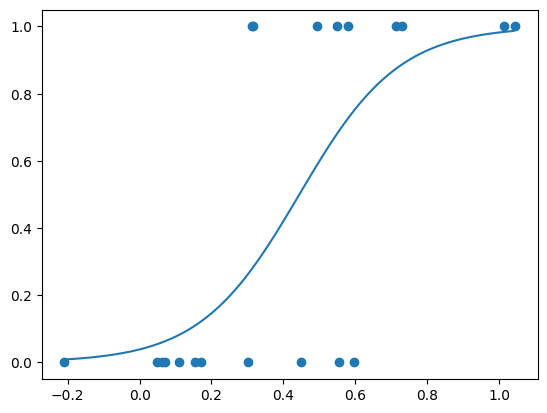

In [2]:
# Create a toy dataset and fit a logistic regression
n = 20
numpy.random.seed(42)
x = numpy.random.rand(n)
y = numpy.array([(1 if x[i] > 0.5 else 0) for i in range(n)])
x = x + numpy.random.normal(0, 0.2, n)
model = sklearn.linear_model.LogisticRegression(penalty = None)
model.fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
x0 = numpy.arange(min(x), max(x), 0.01)
y0 = scipy.special.expit(model.coef_[0, 0] * x0 + model.intercept_)
plt.plot(x0, y0)

In [3]:
# Display the coefficients
w0 = [model.coef_[0, 0], model.intercept_[0]]
w0

[7.212509920279232, -3.205745763273673]

In [4]:
# Write down the optimization problem for w, b and plot the function
def loss(w):
    a = scipy.special.expit(w[0] * x + w[1])
    return -sum(y * numpy.log(a) + (1 - y) * numpy.log(1 - a))

scipy.optimize.minimize(loss, [1, 1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.141121629628897
        x: [ 7.213e+00 -3.206e+00]
      nit: 11
      jac: [-7.153e-07 -2.980e-06]
 hess_inv: [[ 9.380e+00 -3.941e+00]
            [-3.941e+00  2.026e+00]]
     nfev: 36
     njev: 12

In [5]:
# Start with the sklearn solution
scipy.optimize.minimize(loss, w0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.141121629625145
        x: [ 7.213e+00 -3.206e+00]
      nit: 4
      jac: [-1.192e-07 -3.576e-07]
 hess_inv: [[ 1.000e+01 -4.251e+00]
            [-4.251e+00  2.162e+00]]
     nfev: 15
     njev: 5

In [6]:
# List the sequence of iterations
sol = scipy.optimize.minimize(loss, [-5, -5], options = {'return_all': True}).allvecs
sol

[array([-5., -5.]),
 array([-2.26913122, -0.75207631]),
 array([-0.57681179,  0.64962102]),
 array([ 1.4597948, -0.5180649]),
 array([ 4.38102668, -1.92109044]),
 array([ 5.67329187, -2.51164373]),
 array([ 6.71276624, -2.97915751]),
 array([ 7.11786628, -3.16180172]),
 array([ 7.20674425, -3.20264496]),
 array([ 7.21272043, -3.20568452]),
 array([ 7.21277102, -3.20581796]),
 array([ 7.21268384, -3.20582677])]

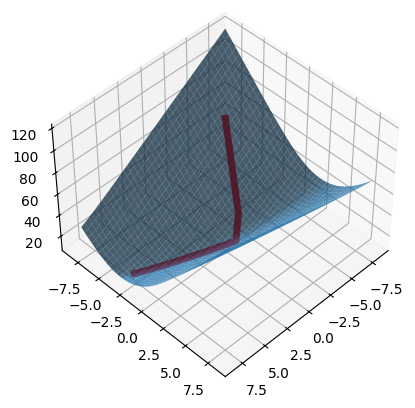

In [7]:
# Plot the surface
r = max(abs(model.coef_[0, 0]), abs(model.intercept_[0])) + 1
x1, y1 = numpy.meshgrid(numpy.arange(-r, r, 0.1), numpy.arange(-r, r, 0.1))
z1 = numpy.zeros(x1.shape)
for i in range(len(x1)):
    for j in range(len(x1[0])):
        z1[i,j] = loss([x1[i,j], y1[i,j]])
x2 = numpy.zeros(len(sol))
y2 = numpy.zeros(len(sol))
z2 = numpy.zeros(len(sol))
for i in range(len(sol)):
    x2[i] = sol[i][0]
    y2[i] = sol[i][1]
    z2[i] = loss([x2[i], y2[i]])
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(x1, y1, z1, alpha = 0.75)
ax.plot3D(x2, y2, z2, c = "red", lw = 5)
ax.view_init(45, 45)

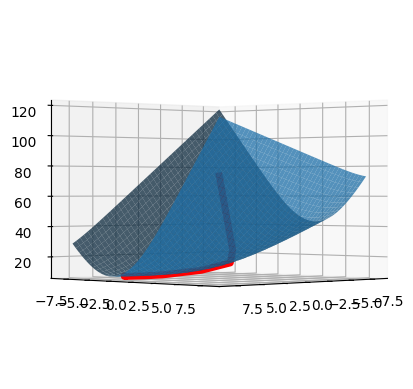

In [8]:
# Change viewing angle
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(x1, y1, z1, alpha = 0.75)
ax.plot3D(x2, y2, z2, c = "red", lw = 5)
ax.view_init(0, 45)